# Feature engineer with various clustering methods

## Pre-process data

#### I am going to run a clustering algorithm on certain columns, to determine the clusters and use clustering as a feature

In [109]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [111]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/house/train.csv'
df = pd.read_csv(data)

In [112]:
cluster_df = df[['OverallQual', 'LotArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu', 'SaleCondition', 'Neighborhood', 'ExterQual']]

In [113]:
#Change to categorical
cluster_df["GarageFinish"] = cluster_df["GarageFinish"].astype('category').cat.codes
cluster_df["BsmtQual"] = cluster_df["BsmtQual"].astype('category').cat.codes
cluster_df["HeatingQC"] = cluster_df["HeatingQC"].astype('category').cat.codes
cluster_df["FireplaceQu"] = cluster_df["FireplaceQu"].astype('category').cat.codes
cluster_df["SaleCondition"] = cluster_df["SaleCondition"].astype('category').cat.codes
cluster_df["ExterQual"] = cluster_df["ExterQual"].astype('category').cat.codes
cluster_df["Neighborhood"] = cluster_df["Neighborhood"].astype('category').cat.codes

cluster_df = cluster_df.fillna(0)
cluster_df["GarageYrBlt"] = cluster_df["GarageYrBlt"].astype(int)

<ipython-input-113-96733fc54160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["GarageFinish"] = cluster_df["GarageFinish"].astype('category').cat.codes
<ipython-input-113-96733fc54160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["BsmtQual"] = cluster_df["BsmtQual"].astype('category').cat.codes
<ipython-input-113-96733fc54160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [114]:
#Numpy Array form
cluster_array = cluster_df.to_numpy()

#### These were features with high importance, from feature_aggregate.ipynb

### KMeans Clustering

In [115]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)

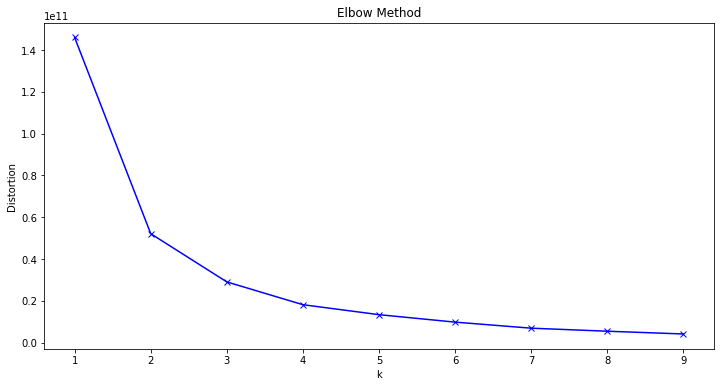

In [116]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

#### It looks like the bend happens around 2-4 clusters, so we can see the distinction below

### Hierarchal Clustering

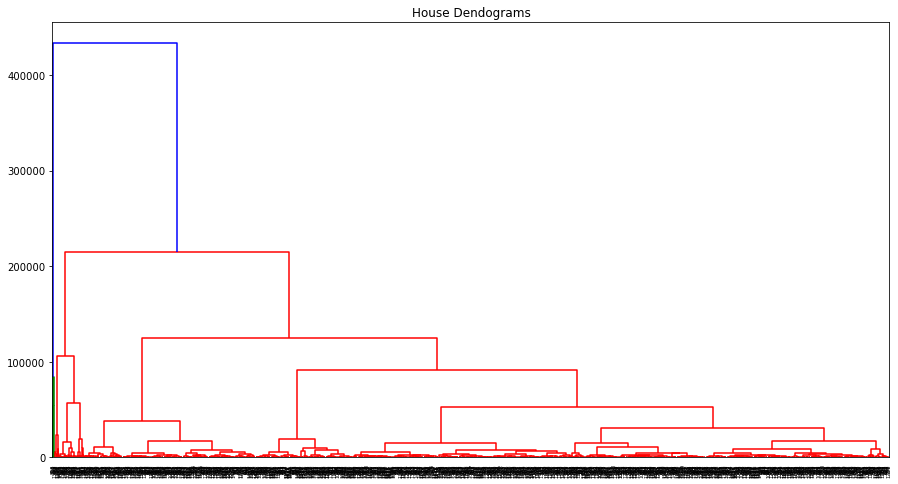

In [117]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 8))
plt.title("House Dendograms")
dend = shc.dendrogram(shc.linkage(cluster_array, method='ward'))

#### There is a method in which we can draw a fake horizontal line to see the amount of clusters

#### In this case, there are about 2, similar to the elbow curve

### Silhouette Score

In [118]:
from sklearn.metrics import silhouette_score

K = range(2,10)
for k in K:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(cluster_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.9650254430641279)
For n_clusters = 3, silhouette score is 0.8331051968370001)
For n_clusters = 4, silhouette score is 0.4799430401825849)
For n_clusters = 5, silhouette score is 0.493684799460725)
For n_clusters = 6, silhouette score is 0.4927203675390289)
For n_clusters = 7, silhouette score is 0.4991263481619136)
For n_clusters = 8, silhouette score is 0.4994451787350613)
For n_clusters = 9, silhouette score is 0.4842341195564782)


#### We have determined that 2 or 3 clusters will be the most optimal amount

In [119]:
from sklearn.cluster import AgglomerativeClustering

# Use three clusters from elbow curve
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster = cluster.fit_predict(cluster_array)
agg_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_array)
kmeans_cluster = kmeans.labels_
kmeans_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

#### We can use both the clustering from Agglomerative AND Kmeans as features

In [121]:
cluster_df = df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu', 'SaleCondition', 'Neighborhood', 'ExterQual']]

In [122]:
cluster_df["agg_cluster"] = agg_cluster
cluster_df["kmeans_cluster"] = kmeans_cluster

<ipython-input-122-b9d59b7e44f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["agg_cluster"] = agg_cluster
<ipython-input-122-b9d59b7e44f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["kmeans_cluster"] = kmeans_cluster


In [123]:
### Model building with new features

In [124]:
cluster_df.head()

,SalePrice,OverallQual,LotArea,GarageYrBlt,GarageFinish,GarageCars,GarageArea,BsmtQual,TotalBsmtSF,HeatingQC,FireplaceQu,SaleCondition,Neighborhood,ExterQual,agg_cluster,kmeans_cluster
0,208500,7,8450,2003.0,RFn,2,548,Gd,856,Ex,NaN,Normal,CollgCr,Gd,0,0
1,181500,6,9600,1976.0,RFn,2,460,Gd,1262,Ex,TA,Normal,Veenker,TA,0,0
2,223500,7,11250,2001.0,RFn,2,608,Gd,920,Ex,TA,Normal,CollgCr,Gd,0,0
3,140000,7,9550,1998.0,Unf,3,642,TA,756,Gd,Gd,Abnorml,Crawfor,TA,0,0
4,250000,8,14260,2000.0,RFn,3,836,Gd,1145,Ex,TA,Normal,NoRidge,Gd,0,0


In [125]:
cluster_df["agg_cluster"].value_counts()

0    1406
2      50
1       4
Name: agg_cluster, dtype: int64

In [126]:
cluster_df["kmeans_cluster"].value_counts()

0    1423
2      33
1       4
Name: kmeans_cluster, dtype: int64

#### Previously, our accuracy was 0.05364256660835798 Normalised RMSE

In [127]:
#Change to categorical
cluster_df["GarageFinish"] = cluster_df["GarageFinish"].astype('category').cat.codes
cluster_df["BsmtQual"] = cluster_df["BsmtQual"].astype('category').cat.codes
cluster_df["HeatingQC"] = cluster_df["HeatingQC"].astype('category').cat.codes
cluster_df["FireplaceQu"] = cluster_df["FireplaceQu"].astype('category').cat.codes
cluster_df["SaleCondition"] = cluster_df["SaleCondition"].astype('category').cat.codes
cluster_df["ExterQual"] = cluster_df["ExterQual"].astype('category').cat.codes
cluster_df["Neighborhood"] = cluster_df["Neighborhood"].astype('category').cat.codes

cluster_df = cluster_df.fillna(0)
cluster_df["GarageYrBlt"] = cluster_df["GarageYrBlt"].astype(int)

<ipython-input-127-96733fc54160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["GarageFinish"] = cluster_df["GarageFinish"].astype('category').cat.codes
<ipython-input-127-96733fc54160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["BsmtQual"] = cluster_df["BsmtQual"].astype('category').cat.codes
<ipython-input-127-96733fc54160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

### Catboost Model

In [128]:
X = cluster_df.drop(["SalePrice"], axis = 1)
y = cluster_df[["SalePrice"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
category = ["OverallQual", "GarageYrBlt", "GarageFinish", "GarageCars", "BsmtQual", "HeatingQC", "FireplaceQu", "SaleCondition", "Neighborhood", "ExterQual", "agg_cluster", "kmeans_cluster"]

In [130]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SalePrice       1460 non-null   int64
 1   OverallQual     1460 non-null   int64
 2   LotArea         1460 non-null   int64
 3   GarageYrBlt     1460 non-null   int64
 4   GarageFinish    1460 non-null   int8 
 5   GarageCars      1460 non-null   int64
 6   GarageArea      1460 non-null   int64
 7   BsmtQual        1460 non-null   int8 
 8   TotalBsmtSF     1460 non-null   int64
 9   HeatingQC       1460 non-null   int8 
 10  FireplaceQu     1460 non-null   int8 
 11  SaleCondition   1460 non-null   int8 
 12  Neighborhood    1460 non-null   int8 
 13  ExterQual       1460 non-null   int8 
 14  agg_cluster     1460 non-null   int64
 15  kmeans_cluster  1460 non-null   int32
dtypes: int32(1), int64(8), int8(7)
memory usage: 107.1 KB


In [131]:
cat_boost = CatBoostRegressor(depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 73788.4357044	total: 4.65ms	remaining: 4.64s
1:	learn: 69546.1745652	total: 7.68ms	remaining: 3.83s
2:	learn: 66450.9758339	total: 10.4ms	remaining: 3.46s
3:	learn: 63254.0161434	total: 14ms	remaining: 3.48s
4:	learn: 60652.8343931	total: 17ms	remaining: 3.38s
5:	learn: 58050.6329432	total: 20.6ms	remaining: 3.42s
6:	learn: 55625.0224430	total: 23.7ms	remaining: 3.36s
7:	learn: 53404.4187672	total: 26.4ms	remaining: 3.27s
8:	learn: 51424.4595054	total: 29.3ms	remaining: 3.23s
9:	learn: 49667.5277118	total: 32.6ms	remaining: 3.23s
10:	learn: 47972.6188717	total: 35.2ms	remaining: 3.17s
11:	learn: 46671.7964911	total: 38.4ms	remaining: 3.16s
12:	learn: 45336.6001766	total: 41.6ms	remaining: 3.16s
13:	learn: 44104.0953881	total: 44.1ms	remaining: 3.11s
14:	learn: 43236.1253452	total: 47.5ms	remaining: 3.12s
15:	learn: 42225.7472577	total: 51.2ms	remaining: 3.15s
16:	learn: 41251.7826142	total: 53ms	remaining: 3.06s
17:	learn: 40346.7159010	total: 54.8ms	remaining: 2.99s
18:	lear

159:	learn: 27167.1403074	total: 338ms	remaining: 1.77s
160:	learn: 27153.7025899	total: 340ms	remaining: 1.77s
161:	learn: 27149.5910880	total: 342ms	remaining: 1.77s
162:	learn: 27146.7434320	total: 345ms	remaining: 1.77s
163:	learn: 27116.3183552	total: 348ms	remaining: 1.77s
164:	learn: 27106.0259905	total: 351ms	remaining: 1.77s
165:	learn: 27096.5686292	total: 353ms	remaining: 1.77s
166:	learn: 27066.6252532	total: 357ms	remaining: 1.78s
167:	learn: 27056.7900019	total: 361ms	remaining: 1.79s
168:	learn: 27047.5905025	total: 364ms	remaining: 1.79s
169:	learn: 27040.2789631	total: 367ms	remaining: 1.79s
170:	learn: 27027.6043656	total: 369ms	remaining: 1.79s
171:	learn: 27009.1917628	total: 372ms	remaining: 1.79s
172:	learn: 27007.0134985	total: 374ms	remaining: 1.79s
173:	learn: 26981.1440902	total: 377ms	remaining: 1.79s
174:	learn: 26927.9977222	total: 379ms	remaining: 1.79s
175:	learn: 26911.7045519	total: 382ms	remaining: 1.79s
176:	learn: 26887.5057465	total: 385ms	remaining

342:	learn: 24713.8366000	total: 713ms	remaining: 1.37s
343:	learn: 24707.9822260	total: 716ms	remaining: 1.36s
344:	learn: 24706.8185598	total: 719ms	remaining: 1.36s
345:	learn: 24700.5255748	total: 722ms	remaining: 1.36s
346:	learn: 24663.1535547	total: 725ms	remaining: 1.36s
347:	learn: 24651.7432509	total: 728ms	remaining: 1.36s
348:	learn: 24646.6323704	total: 730ms	remaining: 1.36s
349:	learn: 24640.5783602	total: 733ms	remaining: 1.36s
350:	learn: 24636.1143185	total: 734ms	remaining: 1.36s
351:	learn: 24634.9861285	total: 736ms	remaining: 1.35s
352:	learn: 24633.6099199	total: 738ms	remaining: 1.35s
353:	learn: 24631.3915745	total: 740ms	remaining: 1.35s
354:	learn: 24620.6862180	total: 743ms	remaining: 1.35s
355:	learn: 24617.6746153	total: 745ms	remaining: 1.35s
356:	learn: 24608.9405931	total: 747ms	remaining: 1.34s
357:	learn: 24605.9480886	total: 749ms	remaining: 1.34s
358:	learn: 24593.7370293	total: 751ms	remaining: 1.34s
359:	learn: 24564.0537926	total: 753ms	remaining

513:	learn: 22816.1676766	total: 1.09s	remaining: 1.03s
514:	learn: 22802.5048220	total: 1.09s	remaining: 1.03s
515:	learn: 22801.5462163	total: 1.1s	remaining: 1.03s
516:	learn: 22799.6729770	total: 1.1s	remaining: 1.03s
517:	learn: 22799.6371907	total: 1.1s	remaining: 1.02s
518:	learn: 22757.9394672	total: 1.1s	remaining: 1.02s
519:	learn: 22749.3185060	total: 1.1s	remaining: 1.02s
520:	learn: 22732.7026457	total: 1.11s	remaining: 1.02s
521:	learn: 22731.1662103	total: 1.11s	remaining: 1.02s
522:	learn: 22725.2183973	total: 1.11s	remaining: 1.01s
523:	learn: 22707.7070910	total: 1.11s	remaining: 1.01s
524:	learn: 22701.4285881	total: 1.11s	remaining: 1.01s
525:	learn: 22694.2195270	total: 1.12s	remaining: 1.01s
526:	learn: 22687.3126680	total: 1.12s	remaining: 1s
527:	learn: 22668.0405692	total: 1.12s	remaining: 1s
528:	learn: 22650.7623999	total: 1.12s	remaining: 1s
529:	learn: 22639.8998244	total: 1.13s	remaining: 1000ms
530:	learn: 22628.4716128	total: 1.13s	remaining: 998ms
531:	

693:	learn: 21103.2138614	total: 1.46s	remaining: 646ms
694:	learn: 21097.7025013	total: 1.47s	remaining: 644ms
695:	learn: 21090.1028183	total: 1.47s	remaining: 642ms
696:	learn: 21089.3598450	total: 1.47s	remaining: 640ms
697:	learn: 21074.1936258	total: 1.48s	remaining: 638ms
698:	learn: 21061.2350086	total: 1.48s	remaining: 637ms
699:	learn: 21057.3599974	total: 1.48s	remaining: 635ms
700:	learn: 21049.4319834	total: 1.48s	remaining: 632ms
701:	learn: 21031.3591895	total: 1.48s	remaining: 630ms
702:	learn: 21026.2559717	total: 1.49s	remaining: 628ms
703:	learn: 21021.3757238	total: 1.49s	remaining: 626ms
704:	learn: 21006.2612903	total: 1.49s	remaining: 624ms
705:	learn: 20990.9477888	total: 1.49s	remaining: 622ms
706:	learn: 20987.7084534	total: 1.5s	remaining: 620ms
707:	learn: 20975.6383174	total: 1.5s	remaining: 618ms
708:	learn: 20968.5521728	total: 1.5s	remaining: 616ms
709:	learn: 20962.2879148	total: 1.5s	remaining: 614ms
710:	learn: 20936.9146412	total: 1.5s	remaining: 611

872:	learn: 19732.9027965	total: 1.84s	remaining: 267ms
873:	learn: 19730.4493354	total: 1.84s	remaining: 265ms
874:	learn: 19722.0244402	total: 1.84s	remaining: 263ms
875:	learn: 19721.7192546	total: 1.85s	remaining: 261ms
876:	learn: 19719.1264408	total: 1.85s	remaining: 259ms
877:	learn: 19715.5196765	total: 1.85s	remaining: 257ms
878:	learn: 19708.5608302	total: 1.85s	remaining: 255ms
879:	learn: 19697.4149610	total: 1.86s	remaining: 253ms
880:	learn: 19696.8918679	total: 1.86s	remaining: 251ms
881:	learn: 19693.8240793	total: 1.86s	remaining: 249ms
882:	learn: 19691.3422234	total: 1.86s	remaining: 247ms
883:	learn: 19690.8570651	total: 1.87s	remaining: 245ms
884:	learn: 19689.4055999	total: 1.87s	remaining: 243ms
885:	learn: 19686.9426165	total: 1.87s	remaining: 241ms
886:	learn: 19685.3204623	total: 1.87s	remaining: 239ms
887:	learn: 19677.5390840	total: 1.87s	remaining: 236ms
888:	learn: 19677.5181443	total: 1.88s	remaining: 234ms
889:	learn: 19671.9572927	total: 1.88s	remaining

In [132]:
y_pred = cat_boost.predict(X_test)

In [133]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,339824.598281
1,133000,136920.638577
2,110000,117907.954909
3,192000,226811.651997
4,88000,98842.199390


In [134]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

37639.01632916916

In [135]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.055514773346857164

#### Looks like our RMSE went up, so maybe the clusters don't really help with the model!